## 导入数据

In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import re
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

df = pd.read_csv('data/tap_fun_train.csv')

In [2]:
#复制一份数据
df1=df.copy()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float64(13), int64(95), object(1)
memory usage: 1.9+ GB


In [4]:
df1.describe()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
count,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,...,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06
mean,1.529543e+06,4.543069e+05,3.698433e+05,1.897788e+05,1.376074e+05,8.075623e+04,3.613170e+04,5.855155e+05,3.548102e+05,7.538954e+04,...,2.148313e+00,1.059639e+00,9.838589e-01,2.844738e+00,2.832409e+00,2.556749e+00,1.020749e+01,5.346691e-01,5.770699e-02,1.793146e+00
std,9.399393e+05,4.958667e+06,3.737720e+06,4.670620e+06,3.370166e+06,2.220540e+06,1.782499e+06,5.868629e+06,3.400632e+06,9.662892e+05,...,1.167797e+01,9.074459e+00,8.951280e+00,1.276245e+01,1.271820e+01,1.184737e+01,3.895946e+01,2.263835e+01,7.090886e-01,8.846303e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.499925e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.419095e+06,4.203800e+04,9.830000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.458700e+04,6.470000e+03,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.299006e+06,1.531180e+05,9.855700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.360010e+05,6.605400e+04,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.190530e+06,1.239962e+09,7.995875e+08,1.214869e+09,7.962378e+08,5.744961e+08,4.481972e+08,1.470644e+09,8.889537e+08,2.637228e+08,...,2.054000e+03,2.051000e+03,1.904000e+03,5.090000e+02,5.090000e+02,4.880000e+02,2.049667e+03,7.457950e+03,1.050000e+02,3.297781e+04


In [7]:
#查询数据条数
df1.shape[0]
# 2288007

2288007

In [10]:
df1.isnull().any().any()

False

In [ ]:
df1.isnull().any().any()

In [5]:
#以user_id为维度，删除重复数据，并查看用户总数
df1 = df1.drop_duplicates(subset='user_id')
print('用户总数：',len(df1['user_id']))

用户总数： 2288007


## 用户分析

In [11]:
reg_user = df1[['user_id', 'register_time']]


In [12]:
reg_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288007 entries, 0 to 2288006
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   register_time  object
dtypes: int64(1), object(1)
memory usage: 52.4+ MB


In [13]:
reg_user

,user_id,register_time
0,1,2018-02-02 19:47:15
1,1593,2018-01-26 00:01:05
2,1594,2018-01-26 00:01:58
3,1595,2018-01-26 00:02:13
4,1596,2018-01-26 00:02:46
...,...,...
2288002,3190526,2018-02-03 14:54:10
2288003,3190527,2018-02-03 14:55:21
2288004,3190528,2018-02-03 14:56:35
2288005,3190529,2018-02-03 14:57:51


In [14]:
reg_user.register_time = pd.to_datetime(reg_user.register_time)

/Users/vincent/.local/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
reg_user.register_time=reg_user.register_time.apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))

/Users/vincent/.local/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


- 计算每天注册人数

In [18]:
reg_user = reg_user.groupby('register_time').user_id.count()

In [19]:
reg_user

register_time
2018-01-26     70250
2018-01-27     70417
2018-01-28     79227
2018-01-29     63803
2018-01-30     50201
2018-01-31     56522
2018-02-01     83245
2018-02-02     60173
2018-02-03     51659
2018-02-04     60421
2018-02-05     60998
2018-02-06     57203
2018-02-07     71576
2018-02-08     72402
2018-02-09     50143
2018-02-10     53521
2018-02-11     54014
2018-02-12     52231
2018-02-13     50638
2018-02-14     54419
2018-02-15     78707
2018-02-16     56355
2018-02-17     44477
2018-02-18     59447
2018-02-19    117311
2018-02-20     92860
2018-02-21     43720
2018-02-22     42110
2018-02-23     44635
2018-02-24     45648
2018-02-25     49835
2018-02-26     42647
2018-02-27     39140
2018-02-28     42928
2018-03-01     36226
2018-03-02     42775
2018-03-03     48970
2018-03-04     50989
2018-03-05     44726
2018-03-06     41438
Name: user_id, dtype: int64

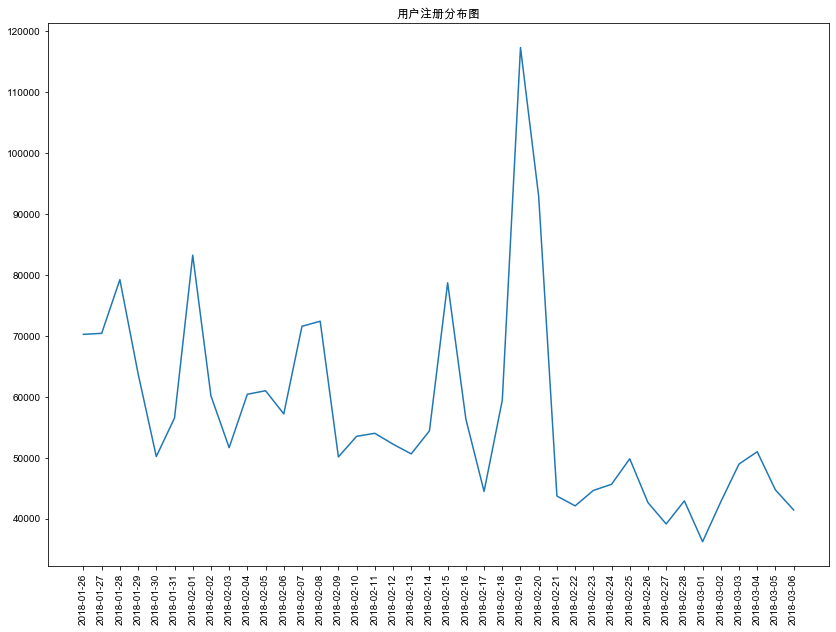

In [20]:
#可视化
fig = plt.figure(figsize=(14, 10))
plt.plot(reg_user)

plt.xticks(rotation=90)
plt.title('用户注册分布图')
plt.show()

## 付费分析（付费率，ARPU，ARPPU）

- 付费率=付费人数/活跃用户

In [21]:
# 付费人数
pay_users = df1[df1['pay_price']>0]

# 活跃人数
active_users = df1[df1['avg_online_minutes'] >=30]

In [24]:
pay_rate = pay_users['user_id'].count()/active_users['user_id'].count()

In [25]:
pay_rate

0.28965155698458744

- ARPU:平均每用户收入

In [30]:
ARPU = pay_users['pay_price'].sum()/active_users['user_id'].count()

In [31]:
ARPU

8.550845140320833

- ARPPU:平均每付费用户收入

In [32]:
ARPPU = pay_users['pay_price'].sum()/pay_users['user_id'].count()

In [33]:
ARPPU

29.521143367359247

## 各等级用户的付费情况

- 根据不同要塞等级分类

In [34]:
df1_user= df1.groupby(['bd_stronghold_level']).user_id.count()

In [35]:
df1_user

bd_stronghold_level
0     940446
1     305723
2     283449
3     158473
4     174717
5     161211
6      90890
7      69298
8      52106
9      31809
10     12689
11      3863
12      1510
13       738
14       462
15       254
16       119
17        77
18        62
19        56
20        40
21        12
22         2
23         1
Name: user_id, dtype: int64

In [36]:
df1_user=df1[['user_id', 'bd_stronghold_level', 'pay_count', 'pay_price']]

In [37]:
df1_user

,user_id,bd_stronghold_level,pay_count,pay_price
0,1,1,0,0.0
1,1593,0,0,0.0
2,1594,0,0,0.0
3,1595,0,0,0.0
4,1596,0,0,0.0
...,...,...,...,...
2288002,3190526,1,0,0.0
2288003,3190527,0,0,0.0
2288004,3190528,2,0,0.0
2288005,3190529,1,0,0.0


- 通过数据透视表汇总各等级人数分布，总付费次数， 总付费金额

In [39]:
table = df1_user.pivot_table(index=['bd_stronghold_level'], values=['user_id','pay_count','pay_price'], aggfunc={'user_id':'count','pay_count':'sum','pay_price':'sum'})

In [40]:
table

,pay_count,pay_price,user_id
bd_stronghold_level,,,
0,9454,67774.46,940446
1,843,4128.57,305723
2,1315,8083.85,283449
3,1428,7394.72,158473
4,1599,7503.01,174717
5,2008,6424.92,161211
6,2988,7397.12,90890
7,5711,15127.89,69298
8,10518,31748.82,52106


In [41]:
user_pay = table.reset_index()

In [42]:
user_pay

,bd_stronghold_level,pay_count,pay_price,user_id
0,0,9454,67774.46,940446
1,1,843,4128.57,305723
2,2,1315,8083.85,283449
3,3,1428,7394.72,158473
4,4,1599,7503.01,174717
5,5,2008,6424.92,161211
6,6,2988,7397.12,90890
7,7,5711,15127.89,69298
8,8,10518,31748.82,52106
9,9,20533,73356.67,31809


- 计算各等级付费人数

In [43]:
user_count = df1_user[df1_user.pay_price>0].groupby('bd_stronghold_level').user_id.count()

In [44]:
user_count

bd_stronghold_level
0     4324
1      500
2      775
3      793
4      949
5     1259
6     1924
7     3424
8     5507
9     8584
10    6931
11    3199
12    1456
13     729
14     462
15     254
16     119
17      77
18      62
19      56
20      40
21      12
22       2
23       1
Name: user_id, dtype: int64

In [45]:
user_pay['user_count']=user_count

In [46]:
user_pay

,bd_stronghold_level,pay_count,pay_price,user_id,user_count
0,0,9454,67774.46,940446,4324
1,1,843,4128.57,305723,500
2,2,1315,8083.85,283449,775
3,3,1428,7394.72,158473,793
4,4,1599,7503.01,174717,949
5,5,2008,6424.92,161211,1259
6,6,2988,7397.12,90890,1924
7,7,5711,15127.89,69298,3424
8,8,10518,31748.82,52106,5507
9,9,20533,73356.67,31809,8584


- 计算等级付费转化率，等级人均付费次数，等级人均付费总额

In [47]:
#计算等级付费转化率，等级人均付费次数，等级人均付费总额
user_pay['pay_rate']=user_pay.user_count/user_pay.user_id
user_pay['user_avgcount']=user_pay.pay_count/user_pay.user_count
user_pay['user_avgmoney']=user_pay.pay_price/user_pay.user_count

In [48]:
user_pay

,bd_stronghold_level,pay_count,pay_price,user_id,user_count,pay_rate,user_avgcount,user_avgmoney
0,0,9454,67774.46,940446,4324,0.004598,2.186401,15.674019
1,1,843,4128.57,305723,500,0.001635,1.686000,8.257140
2,2,1315,8083.85,283449,775,0.002734,1.696774,10.430774
3,3,1428,7394.72,158473,793,0.005004,1.800757,9.324994
4,4,1599,7503.01,174717,949,0.005432,1.684932,7.906228
5,5,2008,6424.92,161211,1259,0.007810,1.594917,5.103193
6,6,2988,7397.12,90890,1924,0.021168,1.553015,3.844657
7,7,5711,15127.89,69298,3424,0.049410,1.667932,4.418192
8,8,10518,31748.82,52106,5507,0.105688,1.909933,5.765175
9,9,20533,73356.67,31809,8584,0.269861,2.392008,8.545744


In [49]:
#修改列名
user_pay.columns = ['要塞等级', '付费次数', '付费总额', '达到人数', '付费人数', '付费转化率', '人均付费次数', '人均付费总额']
#调整列名
user_pay = user_pay[['要塞等级', '达到人数', '付费人数', '付费次数', '付费总额', '付费转化率', '人均付费次数', '人均付费总额']]
user_pay

,要塞等级,达到人数,付费人数,付费次数,付费总额,付费转化率,人均付费次数,人均付费总额
0,0,940446,4324,9454,67774.46,0.004598,2.186401,15.674019
1,1,305723,500,843,4128.57,0.001635,1.686000,8.257140
2,2,283449,775,1315,8083.85,0.002734,1.696774,10.430774
3,3,158473,793,1428,7394.72,0.005004,1.800757,9.324994
4,4,174717,949,1599,7503.01,0.005432,1.684932,7.906228
5,5,161211,1259,2008,6424.92,0.007810,1.594917,5.103193
6,6,90890,1924,2988,7397.12,0.021168,1.553015,3.844657
7,7,69298,3424,5711,15127.89,0.049410,1.667932,4.418192
8,8,52106,5507,10518,31748.82,0.105688,1.909933,5.765175
9,9,31809,8584,20533,73356.67,0.269861,2.392008,8.545744


- 要塞等级和付费转化率的关系

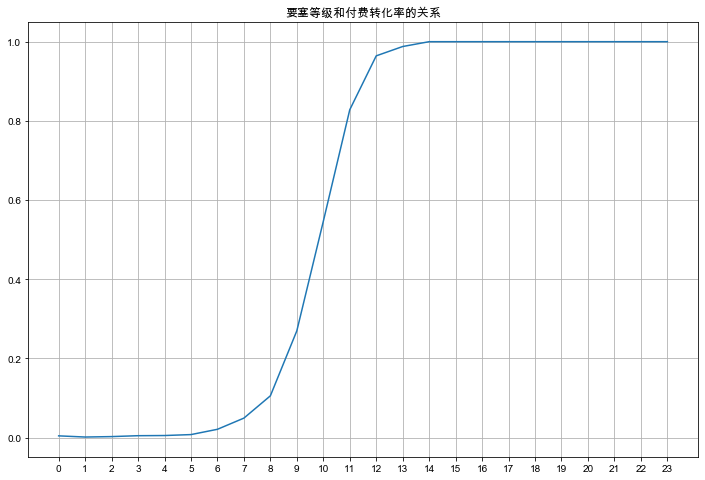

In [50]:
x=user_pay['要塞等级']
y=user_pay['付费转化率']
fig = plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.xticks(x,range(0,len(x),1))
plt.grid(True)
plt.title('要塞等级和付费转化率的关系')
plt.show()

- 要塞等级和人均付费总额的关系

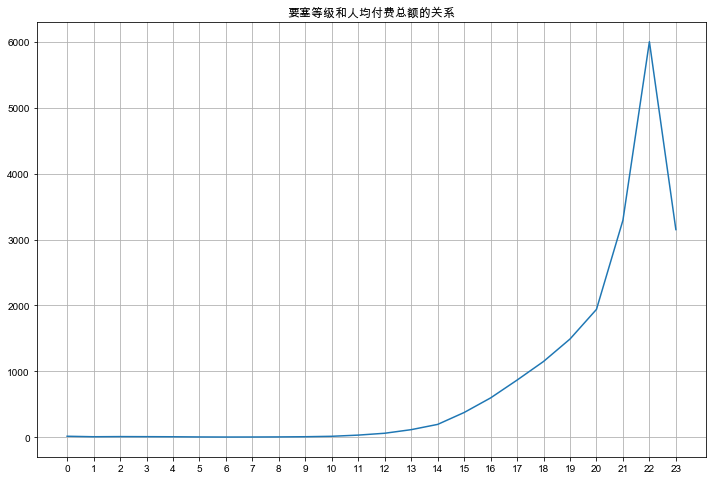

In [51]:
x=user_pay['要塞等级']
y=user_pay['人均付费总额']
fig = plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.xticks(x,range(0,len(x),1))
plt.grid(True)
plt.title('要塞等级和人均付费总额的关系')
plt.show()

- 要塞等级和人均付费次数的关系

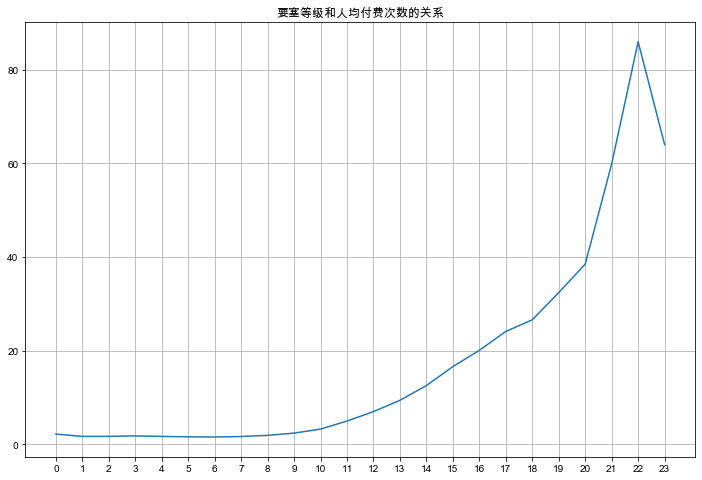

In [52]:
x=user_pay['要塞等级']
y=user_pay['人均付费次数']
fig = plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.xticks(x,range(0,len(x),1))
plt.grid(True)
plt.title('要塞等级和人均付费次数的关系')
plt.show()

- 达到各个要塞等级的人数直方图

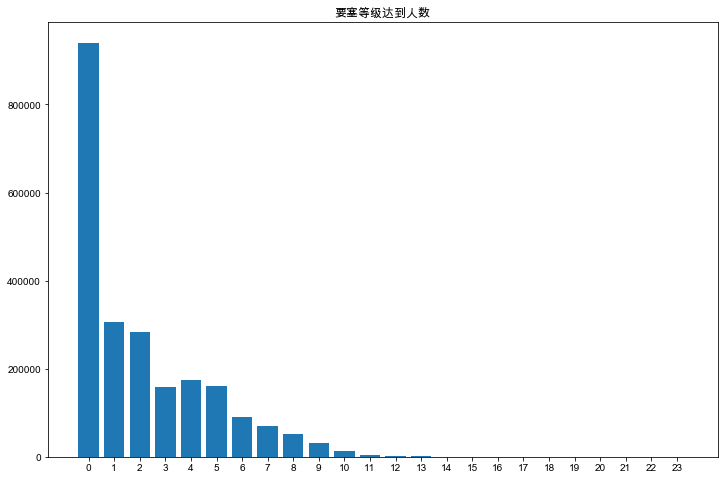

In [53]:
x=user_pay['要塞等级']
y=user_pay['达到人数']
fig = plt.figure(figsize=(12,8))
plt.bar(x,y)
plt.xticks(x,range(0,len(x),1))
plt.title('要塞等级达到人数')
plt.show()

## 消费玩家的道具使用情况

- 对10级以上的玩家进行分类

In [58]:
df1[(df1['pay_price']>=500)&(df1['bd_stronghold_level']>=10)]

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
25454,45453,2018-02-03 03:44:54,225462136.0,168513520.0,223901430.0,167243547.0,109158376.0,94737809.0,222659011.0,125076640.0,...,55,50,50,163,162,160,863.500000,881.80,20,3425.38
26578,48197,2018-01-26 18:13:36,22417513.0,21686778.0,19976755.0,17999210.0,12609517.0,12283631.0,19744780.0,13346770.0,...,2,0,0,2,2,2,215.500000,751.83,17,2786.60
54465,76084,2018-02-17 19:05:09,188636198.0,74696925.0,178572705.0,63252264.0,77754123.0,27685521.0,215915810.0,61355060.0,...,8,7,8,75,75,67,379.833333,656.86,14,1556.77
56807,78426,2018-02-19 10:07:49,245291089.0,205576011.0,235416985.0,194129880.0,121399564.0,115835991.0,249188738.0,156219612.0,...,132,85,127,323,322,282,768.000000,1236.77,23,1661.68
74296,95915,2018-03-06 21:30:08,82854659.0,82863226.0,72190872.0,72208910.0,41223451.0,41220401.0,91580033.0,86489631.0,...,2,0,2,48,48,38,256.333333,776.63,37,776.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279382,3181906,2018-01-28 10:17:52,147386218.0,70249739.0,142011208.0,64719276.0,65946511.0,37305089.0,158432143.0,49024822.0,...,46,29,31,98,98,91,563.833333,561.85,15,1966.67
2283244,3185768,2018-01-31 05:44:46,370902452.0,283202667.0,361126974.0,272310587.0,180236094.0,156093272.0,403277450.0,219024233.0,...,70,58,63,141,141,131,854.166667,706.87,13,4737.31
2283513,3186037,2018-01-31 11:38:44,177053810.0,129084746.0,168937344.0,121074640.0,84025854.0,69172270.0,185000924.0,99810922.0,...,29,16,23,97,97,86,382.166667,1136.78,22,1136.78
2286506,3189030,2018-02-02 10:40:16,241086981.0,183414879.0,235291256.0,172376077.0,81490346.0,72447062.0,224960384.0,153658941.0,...,3,1,3,49,49,42,230.833333,686.83,17,686.83


In [59]:
sup_user = df1[(df1['pay_price']>=500) & (df1['bd_stronghold_level']>=10)]

In [60]:
sup_user

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
25454,45453,2018-02-03 03:44:54,225462136.0,168513520.0,223901430.0,167243547.0,109158376.0,94737809.0,222659011.0,125076640.0,...,55,50,50,163,162,160,863.500000,881.80,20,3425.38
26578,48197,2018-01-26 18:13:36,22417513.0,21686778.0,19976755.0,17999210.0,12609517.0,12283631.0,19744780.0,13346770.0,...,2,0,0,2,2,2,215.500000,751.83,17,2786.60
54465,76084,2018-02-17 19:05:09,188636198.0,74696925.0,178572705.0,63252264.0,77754123.0,27685521.0,215915810.0,61355060.0,...,8,7,8,75,75,67,379.833333,656.86,14,1556.77
56807,78426,2018-02-19 10:07:49,245291089.0,205576011.0,235416985.0,194129880.0,121399564.0,115835991.0,249188738.0,156219612.0,...,132,85,127,323,322,282,768.000000,1236.77,23,1661.68
74296,95915,2018-03-06 21:30:08,82854659.0,82863226.0,72190872.0,72208910.0,41223451.0,41220401.0,91580033.0,86489631.0,...,2,0,2,48,48,38,256.333333,776.63,37,776.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279382,3181906,2018-01-28 10:17:52,147386218.0,70249739.0,142011208.0,64719276.0,65946511.0,37305089.0,158432143.0,49024822.0,...,46,29,31,98,98,91,563.833333,561.85,15,1966.67
2283244,3185768,2018-01-31 05:44:46,370902452.0,283202667.0,361126974.0,272310587.0,180236094.0,156093272.0,403277450.0,219024233.0,...,70,58,63,141,141,131,854.166667,706.87,13,4737.31
2283513,3186037,2018-01-31 11:38:44,177053810.0,129084746.0,168937344.0,121074640.0,84025854.0,69172270.0,185000924.0,99810922.0,...,29,16,23,97,97,86,382.166667,1136.78,22,1136.78
2286506,3189030,2018-02-02 10:40:16,241086981.0,183414879.0,235291256.0,172376077.0,81490346.0,72447062.0,224960384.0,153658941.0,...,3,1,3,49,49,42,230.833333,686.83,17,686.83


In [61]:
nor_user = df1[(df1['pay_price']<500) & (df1['pay_price']>0) & (df1['bd_stronghold_level']>=10)]

In [62]:
nor_user

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
155,1747,2018-01-26 02:36:55,5475019.0,7377434.0,4926938.0,4552369.0,2507392.0,1772039.0,6040642.0,4213417.0,...,1,0,0,34,34,29,311.166667,156.88,12,166.86
381,1973,2018-01-26 08:02:21,55495770.0,12635052.0,54377106.0,12088437.0,23307953.0,7683341.0,64528810.0,9544950.0,...,2,2,2,16,16,15,143.166667,406.87,13,8982.78
481,2073,2018-01-26 09:42:34,637524.0,1077362.0,487265.0,818650.0,296764.0,94500.0,798710.0,1172188.0,...,0,0,0,1,1,1,54.833333,6.97,3,8.96
617,2209,2018-01-26 11:57:39,4236075.0,3860615.0,3571758.0,3022640.0,1767692.0,1272694.0,3711822.0,4484808.0,...,4,3,4,24,24,24,357.000000,56.93,7,167.73
817,2409,2018-01-26 14:20:38,2389795.0,3416253.0,1507554.0,1608056.0,137250.0,280976.0,1200362.0,2137847.0,...,0,0,0,11,11,10,241.166667,1.98,2,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287520,3190044,2018-02-03 03:43:24,7477994.0,7530758.0,4193269.0,3588780.0,1365000.0,27000.0,12692109.0,8315411.0,...,37,10,7,36,36,29,180.166667,0.99,1,0.99
2287618,3190142,2018-02-03 06:37:32,17759716.0,15247976.0,9825215.0,8517560.0,4436774.0,250376.0,25497493.0,18745701.0,...,30,11,20,30,30,26,207.666667,26.95,5,84.86
2287863,3190387,2018-02-03 12:33:14,10948564.0,7732858.0,6873880.0,3552064.0,3818306.0,0.0,16852765.0,5863587.0,...,8,1,2,55,55,53,180.000000,56.91,9,73.87
2287876,3190400,2018-02-03 12:47:11,19554131.0,15299280.0,11649607.0,7750674.0,5868246.0,1144016.0,28173732.0,13398733.0,...,68,47,47,158,158,142,424.333333,37.94,6,56.89


- 消费玩家资源类道具使用情况

In [63]:
#制作资源相关数据集
wood_avg = [sup_user['wood_reduce_value'].mean(), nor_user['wood_reduce_value'].mean()]
stone_avg = [sup_user['stone_reduce_value'].mean(), nor_user['stone_reduce_value'].mean()]
ivory_avg = [sup_user['ivory_reduce_value'].mean(), nor_user['ivory_reduce_value'].mean()]
meat_avg = [sup_user['meat_reduce_value'].mean(), nor_user['meat_reduce_value'].mean()]
magic_avg = [sup_user['magic_reduce_value'].mean(), nor_user['magic_reduce_value'].mean()]

In [64]:
wood_avg

[203848102.96842104, 15217330.907526882]

In [65]:
data = {'高氪玩家':[wood_avg[0], stone_avg[0], ivory_avg[0], meat_avg[0], magic_avg[0]], 
        '低氪玩家':[wood_avg[1], stone_avg[1], ivory_avg[1], meat_avg[1], magic_avg[1]]}

In [66]:
resource = pd.DataFrame(data, index=['木头', '石头', '象牙', '肉', '魔法'])

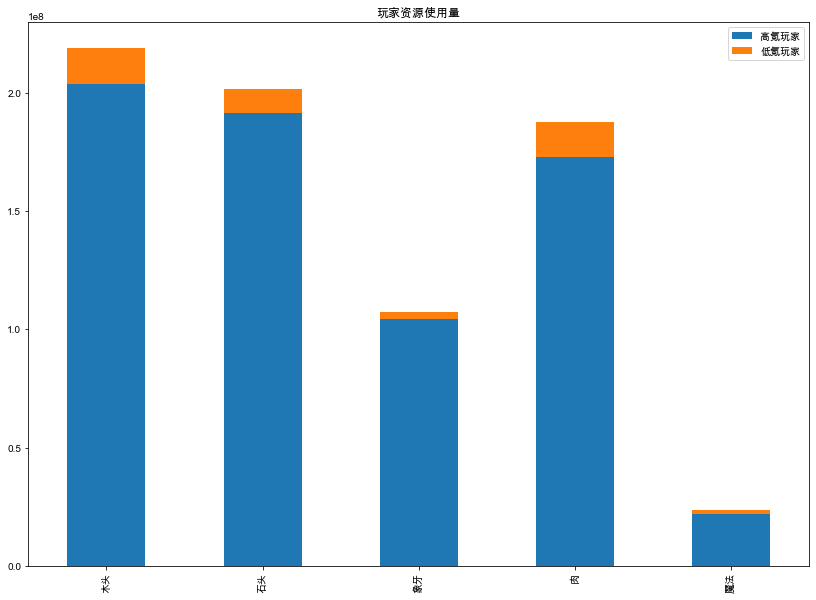

In [67]:
#可视化
resource.plot(kind = 'bar', stacked=True, figsize=(14, 10),legend=True)
plt.title('玩家资源使用量')
plt.show()

- 消费玩家加速券使用情况

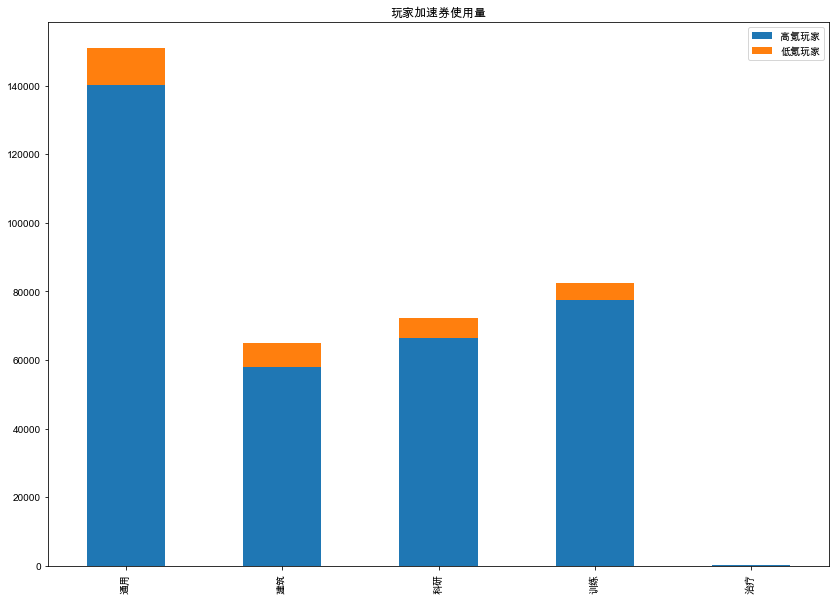

In [69]:
#制作加速券相关数据集
genral_avg = [sup_user['general_acceleration_reduce_value'].mean(), nor_user['general_acceleration_reduce_value'].mean()]
building_avg = [sup_user['building_acceleration_reduce_value'].mean(), nor_user['building_acceleration_reduce_value'].mean()]
reaserch_avg = [sup_user['reaserch_acceleration_reduce_value'].mean(), nor_user['reaserch_acceleration_reduce_value'].mean()]
training_avg = [sup_user['training_acceleration_reduce_value'].mean(), nor_user['training_acceleration_reduce_value'].mean()]
treament_avg = [sup_user['treatment_acceleration_reduce_value'].mean(), nor_user['treatment_acceleration_reduce_value'].mean()]
data = {'高氪玩家':[genral_avg[0], building_avg[0], reaserch_avg[0], training_avg[0], treament_avg[0]], 
        '低氪玩家':[genral_avg[1], building_avg[1], reaserch_avg[1], training_avg[1], treament_avg[1]]}
acceleration = pd.DataFrame(data, index = ['通用', '建筑', '科研', '训练', '治疗'])
#可视化

acceleration.plot(kind = 'bar', stacked=True, figsize=(14, 10))
plt.title('玩家加速券使用量')
plt.show()

## 消费玩家的游戏玩法分析

- 消费玩家在线时长情况

In [70]:
avg_online_minutes = [sup_user['avg_online_minutes'].mean(), nor_user['avg_online_minutes'].mean()]
data = {'高氪玩家':[avg_online_minutes[0]], 
        '低氪玩家':[avg_online_minutes[1]]}
online_time=pd.DataFrame(data, index = ['平均在线时长'])
online_time.head()

,高氪玩家,低氪玩家
平均在线时长,421.771053,260.112378


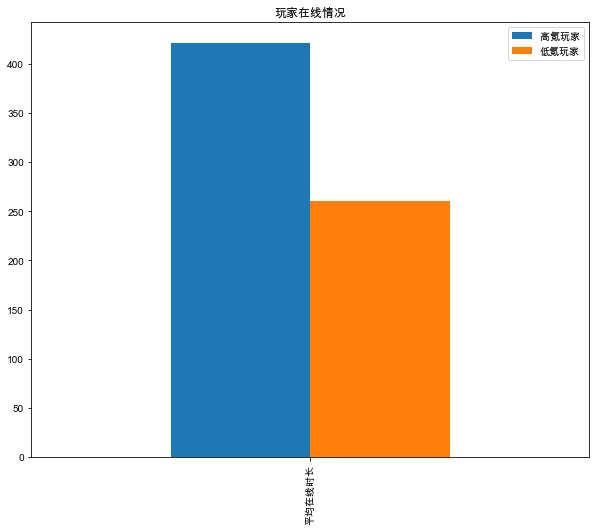

In [71]:
#可视化
online_time.plot(kind = 'bar', figsize=(10,8))
plt.title('玩家在线情况')
plt.show()

- 消费玩家pvp情况

In [72]:
pvp_battle_avg = [sup_user['pvp_battle_count'].mean(), nor_user['pvp_battle_count'].mean()]
pvp_lanch_avg = [sup_user['pvp_lanch_count'].mean(), nor_user['pvp_lanch_count'].mean()]
pvp_win_avg = [sup_user['pvp_win_count'].mean(), nor_user['pvp_win_count'].mean()]
data = {'高氪玩家':[pvp_battle_avg[0], pvp_lanch_avg[0], pvp_win_avg[0]], 
        '低氪玩家':[pvp_battle_avg[1], pvp_lanch_avg[1], pvp_win_avg[1]]}
PVP = pd.DataFrame(data, index = ['PVP次数', '主动发起PVP次数', 'PVP胜利次数'])
PVP

,高氪玩家,低氪玩家
PVP次数,91.452632,47.830722
主动发起PVP次数,71.455263,35.920814
PVP胜利次数,80.294737,38.309140


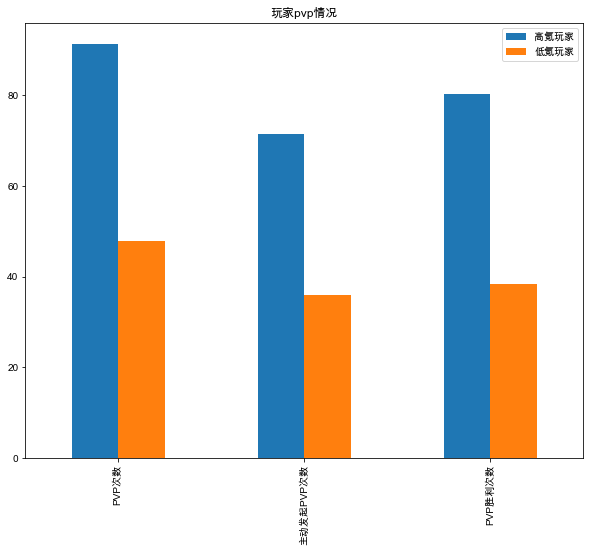

In [73]:
#可视化
PVP.plot(kind = 'bar',  figsize=(10,8))
plt.title('玩家pvp情况')
plt.show()

- 消费玩家pve情况

In [74]:
pve_battle_avg = [sup_user['pve_battle_count'].mean(), nor_user['pve_battle_count'].mean()]
pve_lanch_avg = [sup_user['pve_lanch_count'].mean(), nor_user['pve_lanch_count'].mean()]
pve_win_avg = [sup_user['pve_win_count'].mean(), nor_user['pve_win_count'].mean()]
data = {'高氪玩家':[pve_battle_avg[0], pve_lanch_avg[0], pve_win_avg[0]], 
        '低氪玩家':[pve_battle_avg[1], pve_lanch_avg[1], pve_win_avg[1]]}
PVE = pd.DataFrame(data, index = ['PVE次数', '主动发起PVE次数', 'PVE胜利次数'])

PVE

,高氪玩家,低氪玩家
PVE次数,97.336842,74.394624
主动发起PVE次数,96.273684,73.913057
PVE胜利次数,89.342105,68.380184


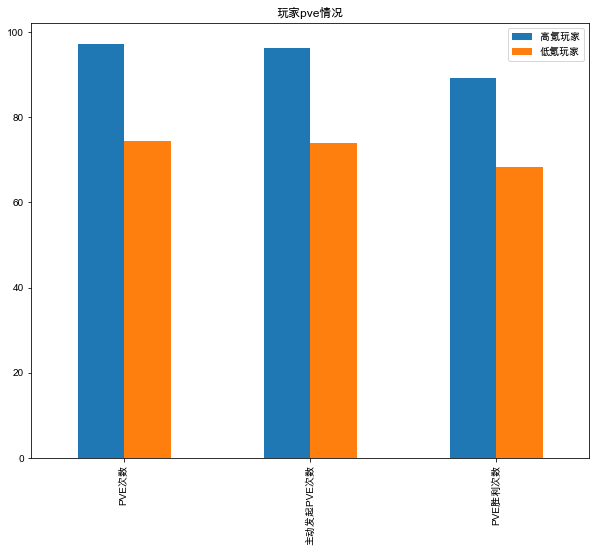

In [75]:
#可视化
PVE.plot(kind = 'bar', figsize=(10,8))
plt.title('玩家pve情况')
plt.show()